# GDP

GDP- log of gdp_1/gdp_2

In [1]:
# Importazione delle librerie necessarie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller

In [27]:
gdp_data = pd.read_excel (r'C:\Users\busco\OneDrive\Documenti\Python Scripts\Repo_tassi_dec\Progetto_Studio\Data\Predittori\GDP.xlsx', sheet_name="GDP modif")

In [28]:
gdp_data.head()

,TIME,Italy
0,1995-Q1,212587.0
1,1995-Q2,214076.0
2,1995-Q3,220929.8
3,1995-Q4,250567.4
4,1996-Q1,237444.5


In [29]:
gdp_data.tail()

,TIME,Italy
101,2020-Q2,373293.7
102,2020-Q3,424499.0
103,2020-Q4,452959.6
104,2021-Q1,410408.5
105,2021-Q2,437605.3


In [30]:
gdp_df=pd.DataFrame(gdp_data)

In [31]:
gdp_df["QUARTER"]=gdp_df["TIME"].str.strip().str[6]
gdp_df["YEAR"]=gdp_df["TIME"].str[:4]

In [32]:
gdp_df.head()

,TIME,Italy,QUARTER,YEAR
0,1995-Q1,212587.0,1,1995
1,1995-Q2,214076.0,2,1995
2,1995-Q3,220929.8,3,1995
3,1995-Q4,250567.4,4,1995
4,1996-Q1,237444.5,1,1996


Creo la variabile GDP come il rapporto annuale del gdp a livelli

In [33]:
gdp_df=gdp_df.sort_values(['TIME'])

In [34]:
gdp_df['Previous GDP'] = gdp_df.sort_values('TIME').groupby('QUARTER')['Italy'].shift(1) 

In [35]:
gdp_df[gdp_df["QUARTER"]=="1"]

,TIME,Italy,QUARTER,YEAR,Previous GDP
0,1995-Q1,212587.0,1,1995,NaN
4,1996-Q1,237444.5,1,1996,212587.0
8,1997-Q1,254735.6,1,1997,237444.5
12,1998-Q1,265767.4,1,1998,254735.6
16,1999-Q1,274207.1,1,1999,265767.4
20,2000-Q1,290846.9,1,2000,274207.1
24,2001-Q1,307933.8,1,2001,290846.9
28,2002-Q1,316157.7,1,2002,307933.8
32,2003-Q1,326392.2,1,2003,316157.7
36,2004-Q1,338937.9,1,2004,326392.2


In [36]:
gdp_df["GDP"]=gdp_df["Italy"]/gdp_df["Previous GDP"]

In [37]:
gdp_df

,TIME,Italy,QUARTER,YEAR,Previous GDP,GDP
0,1995-Q1,212587.0,1,1995,NaN,NaN
1,1995-Q2,214076.0,2,1995,NaN,NaN
2,1995-Q3,220929.8,3,1995,NaN,NaN
3,1995-Q4,250567.4,4,1995,NaN,NaN
4,1996-Q1,237444.5,1,1996,212587.0,1.116929
...,...,...,...,...,...,...
101,2020-Q2,373293.7,2,2020,446006.9,0.836968
102,2020-Q3,424499.0,3,2020,444801.9,0.954355
103,2020-Q4,452959.6,4,2020,476223.8,0.951149
104,2021-Q1,410408.5,1,2021,402824.9,1.018826


In [38]:
gdp_df.drop("Previous GDP", axis=1, inplace=True)

In [39]:
gdp_df

,TIME,Italy,QUARTER,YEAR,GDP
0,1995-Q1,212587.0,1,1995,NaN
1,1995-Q2,214076.0,2,1995,NaN
2,1995-Q3,220929.8,3,1995,NaN
3,1995-Q4,250567.4,4,1995,NaN
4,1996-Q1,237444.5,1,1996,1.116929
...,...,...,...,...,...
101,2020-Q2,373293.7,2,2020,0.836968
102,2020-Q3,424499.0,3,2020,0.954355
103,2020-Q4,452959.6,4,2020,0.951149
104,2021-Q1,410408.5,1,2021,1.018826


In [40]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

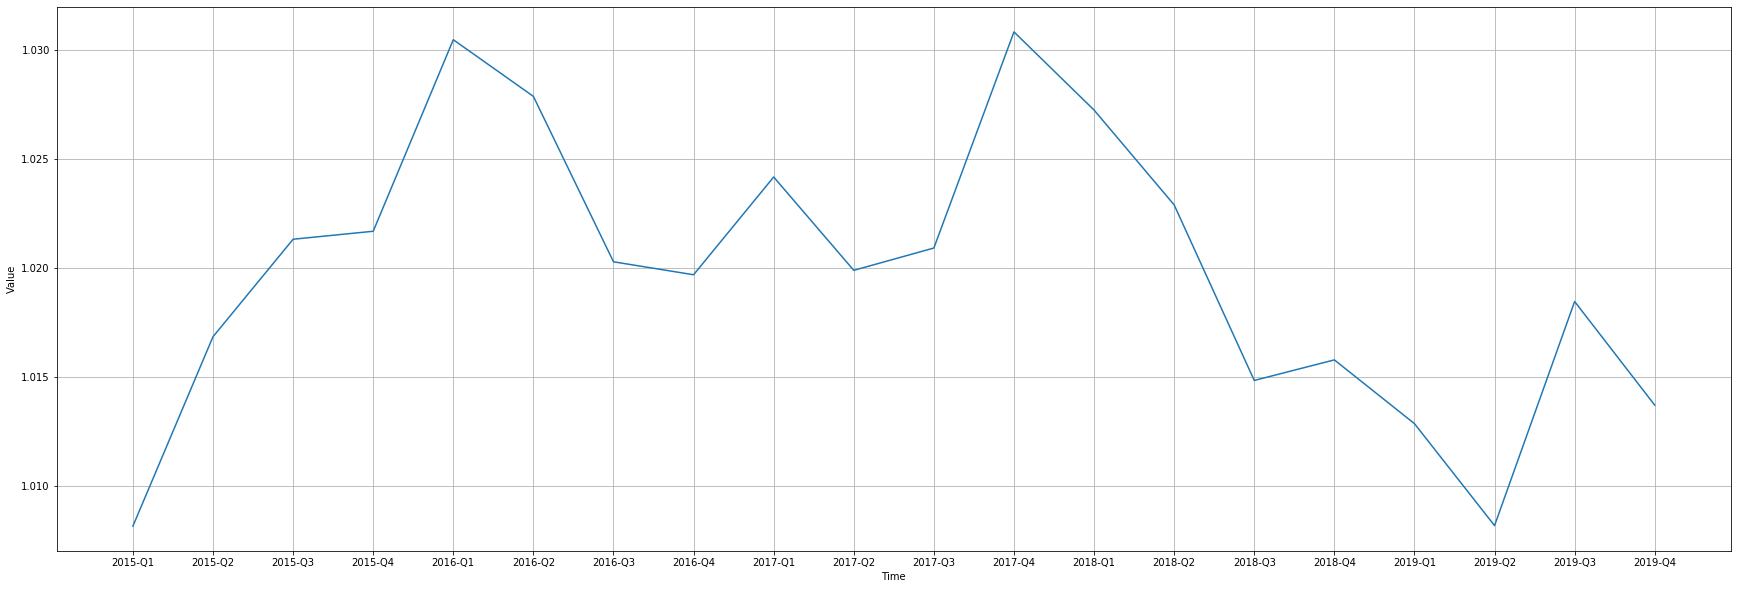

In [16]:
#plot 
plt.figure(figsize=(30, 10))
plot_series(gdp_df["TIME"], gdp_df["GDP"],start=80, end=100)

Tengo la parte di dataset per cui gdp non è missing

In [41]:
gdp_df=gdp_df[gdp_df["GDP"]>0]
print(gdp_df)

        TIME     Italy QUARTER  YEAR       GDP
4    1996-Q1  237444.5       1  1996  1.116929
5    1996-Q2  259333.6       2  1996  1.211409
6    1996-Q3  254300.1       3  1996  1.151045
7    1996-Q4  283871.7       4  1996  1.132916
8    1997-Q1  254735.6       1  1997  1.072822
..       ...       ...     ...   ...       ...
101  2020-Q2  373293.7       2  2020  0.836968
102  2020-Q3  424499.0       3  2020  0.954355
103  2020-Q4  452959.6       4  2020  0.951149
104  2021-Q1  410408.5       1  2021  1.018826
105  2021-Q2  437605.3       2  2021  1.172282

[102 rows x 5 columns]


In [42]:
gdp=gdp_df["GDP"]

In [43]:
print(gdp)

4      1.116929
5      1.211409
6      1.151045
7      1.132916
8      1.072822
         ...   
101    0.836968
102    0.954355
103    0.951149
104    1.018826
105    1.172282
Name: GDP, Length: 102, dtype: float64


C:\Users\busco\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


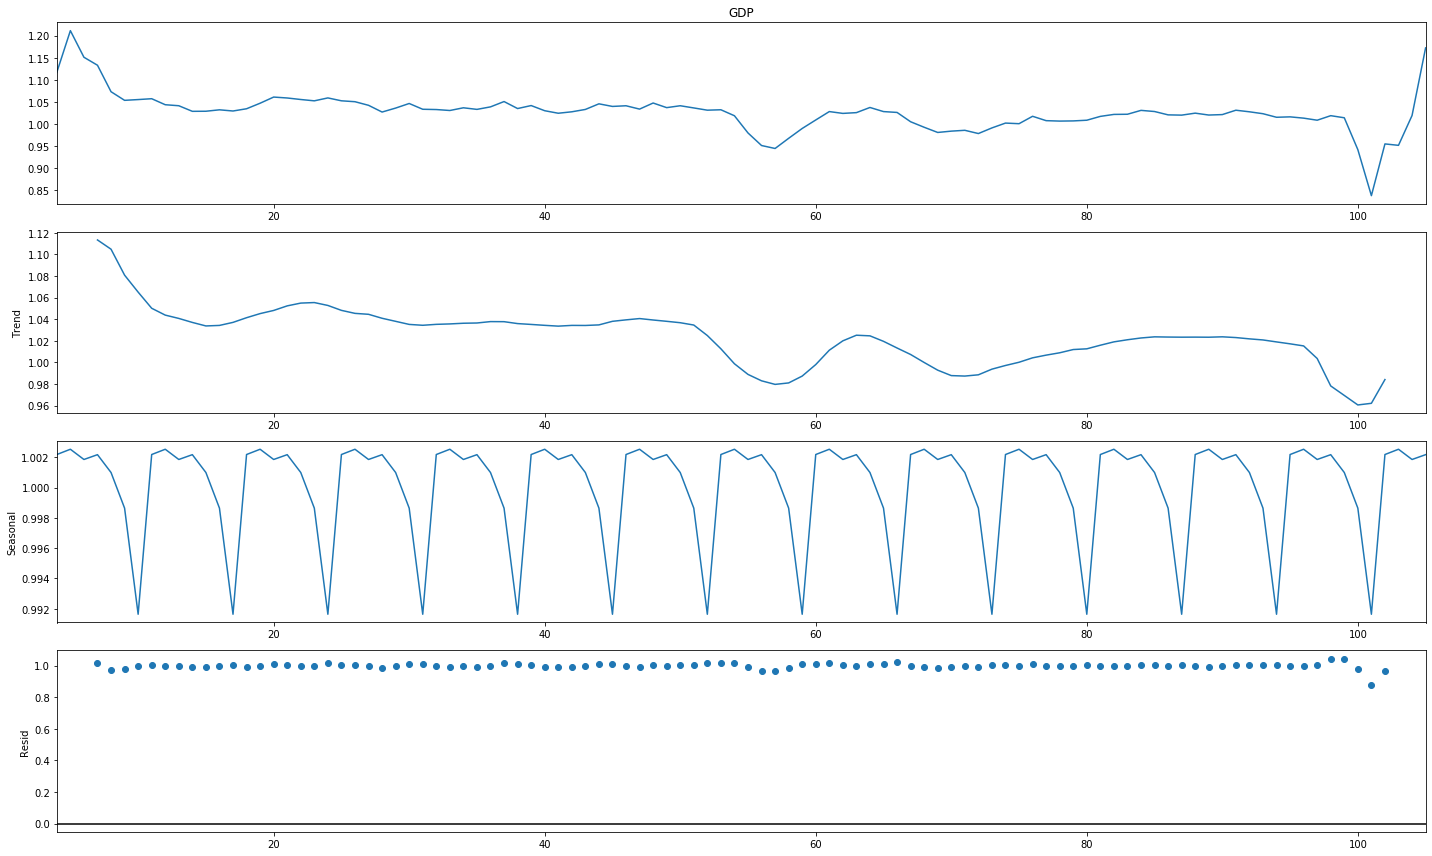

In [20]:
rcParams['figure.figsize'] = 20, 12
decomposition = sm.tsa.seasonal_decompose(gdp, model='multiplicative', filt=None, two_sided=True, freq=7) # freq=1
fig = decomposition.plot()
plt.show()

C:\Users\busco\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


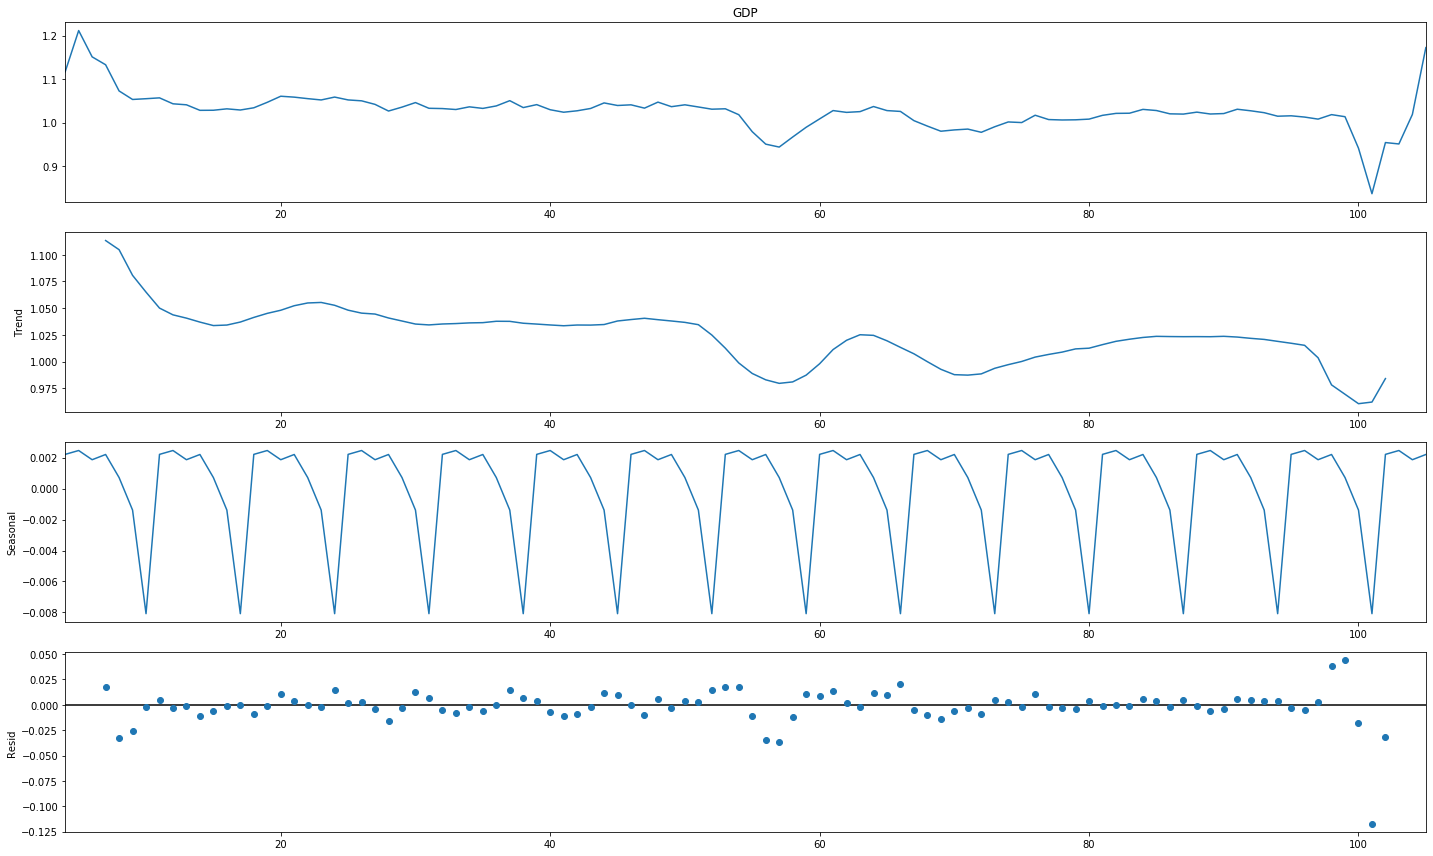

In [21]:
rcParams['figure.figsize'] = 20, 12
decomposition = sm.tsa.seasonal_decompose(gdp, model='additive', filt=None, two_sided=True, freq=7) # freq=1
fig = decomposition.plot()
plt.show()

calcolo la differenza annuale

In [44]:
gdp_df=gdp_df.sort_values(['TIME'])
gdp_df['Previous GDP'] = gdp_df.sort_values('TIME').groupby('QUARTER')['GDP'].shift(1) 

In [45]:
gdp_df

,TIME,Italy,QUARTER,YEAR,GDP,Previous GDP
4,1996-Q1,237444.5,1,1996,1.116929,NaN
5,1996-Q2,259333.6,2,1996,1.211409,NaN
6,1996-Q3,254300.1,3,1996,1.151045,NaN
7,1996-Q4,283871.7,4,1996,1.132916,NaN
8,1997-Q1,254735.6,1,1997,1.072822,1.116929
...,...,...,...,...,...,...
101,2020-Q2,373293.7,2,2020,0.836968,1.008168
102,2020-Q3,424499.0,3,2020,0.954355,1.018463
103,2020-Q4,452959.6,4,2020,0.951149,1.013702
104,2021-Q1,410408.5,1,2021,1.018826,0.941395


In [46]:
gdp_df["GDP_log_dif"]=np.log(gdp_df["GDP"])-np.log(gdp_df["Previous GDP"])

In [54]:
#gdp_df=gdp_df[pd.notnull(gdp_df["GDP_log_dif"])]
gdp_df

,TIME,Italy,QUARTER,YEAR,GDP,Previous GDP,GDP_log_dif
8,1997-Q1,254735.6,1,1997,1.072822,1.116929,-0.040290
9,1997-Q2,273146.9,2,1997,1.053265,1.211409,-0.139890
10,1997-Q3,268288.8,3,1997,1.055009,1.151045,-0.087121
11,1997-Q4,300037.8,4,1997,1.056949,1.132916,-0.069408
12,1998-Q1,265767.4,1,1998,1.043307,1.072822,-0.027897
...,...,...,...,...,...,...,...
101,2020-Q2,373293.7,2,2020,0.836968,1.008168,-0.186104
102,2020-Q3,424499.0,3,2020,0.954355,1.018463,-0.065014
103,2020-Q4,452959.6,4,2020,0.951149,1.013702,-0.063693
104,2021-Q1,410408.5,1,2021,1.018826,0.941395,0.079044


### TEST THE STATIONARITY OF THE SERIE - Augmented Dickey-Fuller
A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary. p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary. (code from https://machinelearningmastery.com/time-series-data-stationary-python/)

In [136]:
X = gdp_df["GDP_log_dif"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.163825
p-value: 0.022176
Critical Values:
	1%: -3.646
	5%: -2.954
	10%: -2.616


C:\Users\busco\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


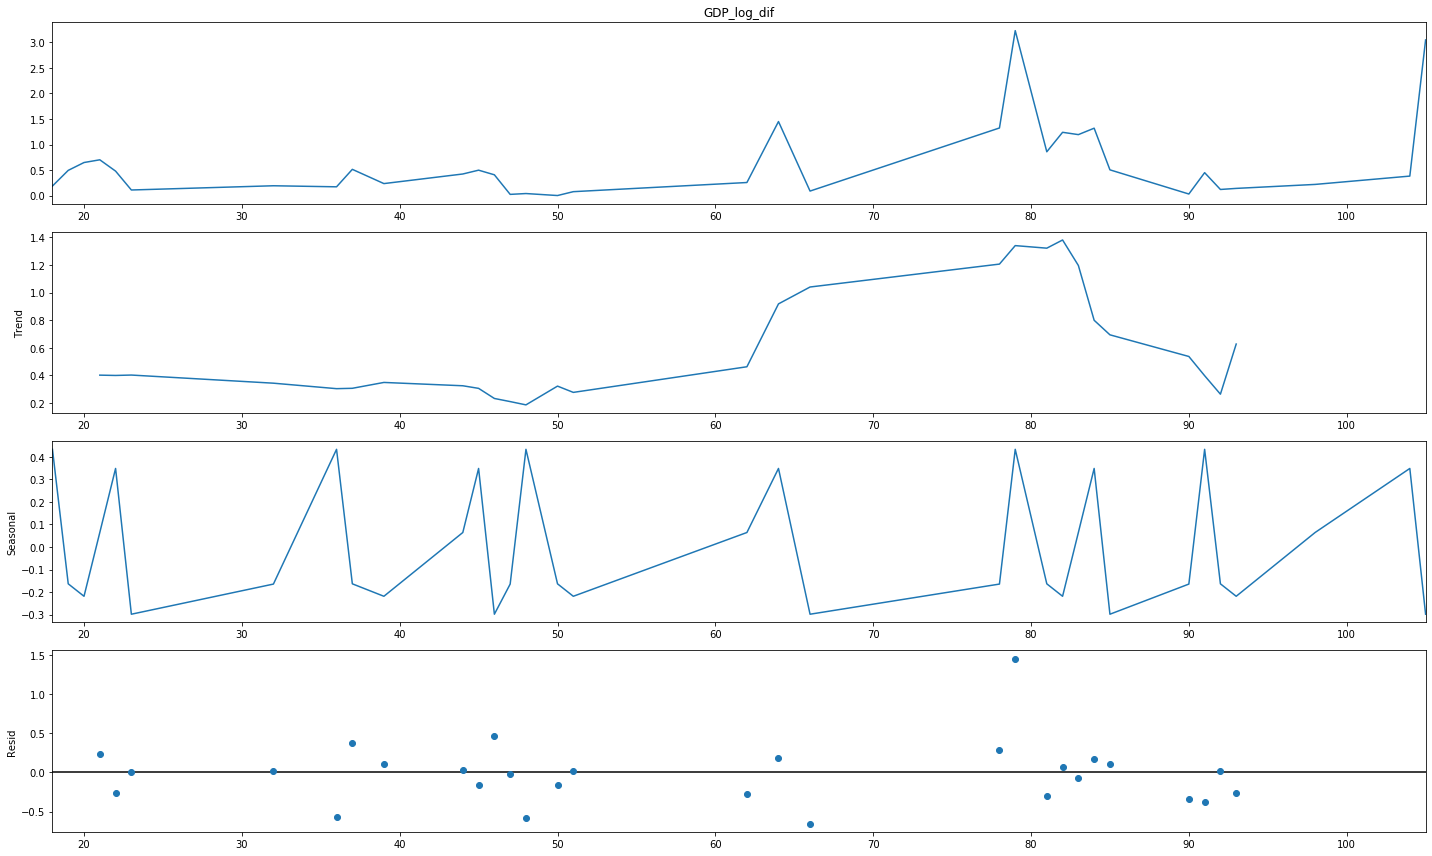

In [137]:
rcParams['figure.figsize'] = 20, 12
decomposition = sm.tsa.seasonal_decompose(gdp_df["GDP_log_dif"], model='addivive', filt=None, two_sided=True, freq=7) # freq=1
fig = decomposition.plot()
plt.show()